## Dimensionality Reduction with PCA
Apply PCA to your record dataset.
Determine the optimal number of principal components to retain.
Visualize the reduced-dimensional data using PCA.
Analyze and interpret the results.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df=pd.read_csv("../data/01-modified-data/team_pp_data_clean.csv")
label = df['playoff'].copy()
df=df.drop(columns=['Unnamed: 0','playoff'])


In [23]:
pca=PCA(n_components=3)
pca.fit(df)
print(pca.components_)
data_pca=pca.transform(df)
data_pca=pd.DataFrame(data_pca,columns=['A','B','C'])
data_pca.head()

[[ 0.01510005  0.00162544  0.28377607  0.35871461  0.23497116  0.6719264
   0.38801159  0.36512297]
 [-0.00396301 -0.00288667  0.28348338  0.3814156   0.36107146 -0.71706232
   0.33169291  0.1398718 ]
 [ 0.03078592  0.01600984  0.06910783  0.22741411  0.00865058  0.13574599
   0.34265581 -0.89799111]]


,A,B,C
0,0.848383,-0.264266,-0.330401
1,1.101650,0.125816,0.188440
2,0.105423,-0.028634,0.195561
3,-0.342185,0.113378,0.221376
4,1.534098,-0.148906,-0.334813


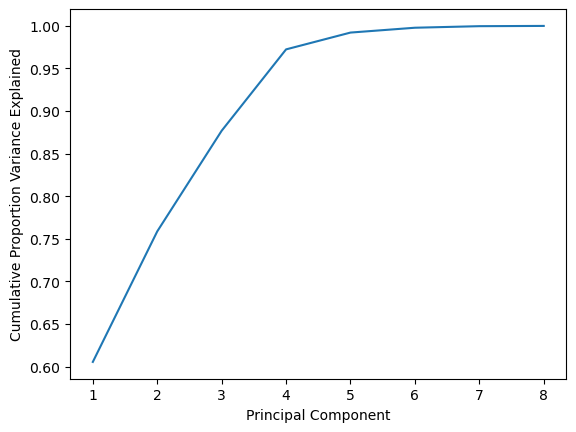

In [24]:
pca=PCA()
pca.fit(df)
exp_variance=np.cumsum(pca.explained_variance_ratio_)
components=[1,2,3,4,5,6,7,8]


plt.plot(components,exp_variance)
plt.ylabel('Cumulative Proportion Variance Explained')
plt.xlabel('Principal Component')
plt.show()


In [28]:
pca=PCA(n_components=4)
pca.fit(df)
print(pca.components_)
data_pca1=pca.transform(df)
data_pca1=pd.DataFrame(data_pca1,columns=['A','B','C','D'])

[[ 0.01510005  0.00162544  0.28377607  0.35871461  0.23497116  0.6719264
   0.38801159  0.36512297]
 [-0.00396301 -0.00288667  0.28348338  0.3814156   0.36107146 -0.71706232
   0.33169291  0.1398718 ]
 [ 0.03078592  0.01600984  0.06910783  0.22741411  0.00865058  0.13574599
   0.34265581 -0.89799111]
 [-0.05875469 -0.05260579 -0.33920603 -0.39153391 -0.27684441 -0.08756225
   0.78543157  0.15559002]]


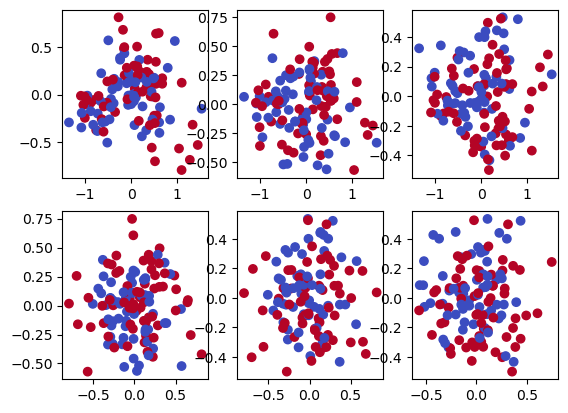

In [50]:
pca_adj_df=data_pca1
pca_adj_df['playoff']=label
pca_adj_df.replace(('Y', 'N'), (1, 0), inplace=True)

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3)

ax1.scatter(pca_adj_df['A'], pca_adj_df['B'], c=pca_adj_df['playoff'], cmap='coolwarm')

ax2.scatter(pca_adj_df['A'], pca_adj_df['C'], c=pca_adj_df['playoff'], cmap='coolwarm')

ax3.scatter(pca_adj_df['A'], pca_adj_df['D'], c=pca_adj_df['playoff'], cmap='coolwarm')

ax4.scatter(pca_adj_df['B'], pca_adj_df['C'], c=pca_adj_df['playoff'], cmap='coolwarm')

ax5.scatter(pca_adj_df['B'], pca_adj_df['D'], c=pca_adj_df['playoff'], cmap='coolwarm')

ax6.scatter(pca_adj_df['C'], pca_adj_df['D'], c=pca_adj_df['playoff'], cmap='coolwarm')
plt.show()

## Dimensionality Reduction with t-SNE
Implement t-SNE on the same dataset.
Explore different perplexity values and their impact.
Visualize the t-SNE output to reveal patterns and clusters.
Compare t-SNE results with PCA results.

shape:  (126, 2)
First few points: 
 [[ 47.8651    -25.15725  ]
 [ 12.342169   47.155964 ]
 [  5.0618544  12.425927 ]
 [ -5.1122675 -23.880129 ]]


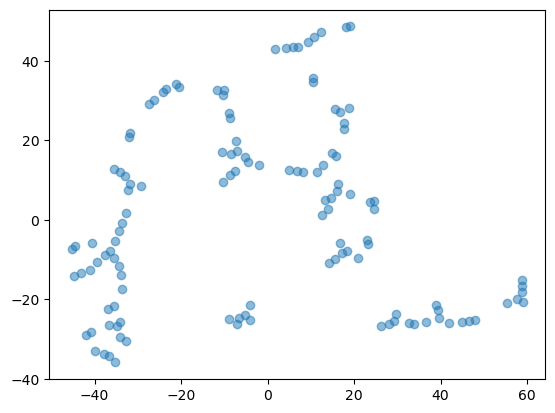

In [60]:
from sklearn.manifold import TSNE
df_embedded=TSNE(n_components=2,learning_rate='auto',init='random',perplexity=3).fit_transform(df)
print("shape: ",df_embedded.shape)
print("First few points: \n",df_embedded[0:4,:])

plt.scatter(df_embedded[:,0],df_embedded[:,1],alpha=0.5)
plt.show()


shape:  (126, 2)
First few points: 
 [[ -3.6992016  17.5209   ]
 [-10.349369    8.448271 ]
 [ -4.1016994   0.3526732]
 [ 12.493119   -8.675746 ]]


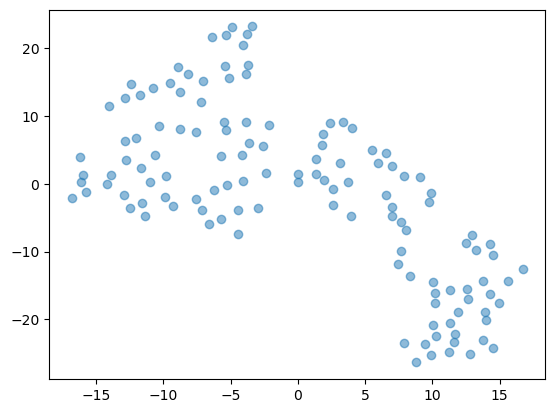

In [61]:
df_embedded=TSNE(n_components=2,learning_rate='auto',init='random',perplexity=15).fit_transform(df)
print("shape: ",df_embedded.shape)
print("First few points: \n",df_embedded[0:4,:])

plt.scatter(df_embedded[:,0],df_embedded[:,1],alpha=0.5)
plt.show()

shape:  (126, 2)
First few points: 
 [[ 7.4365497   0.38167912]
 [ 5.1591644  -2.0074325 ]
 [ 1.5393193  -1.6068077 ]
 [-3.3054237   0.8946872 ]]


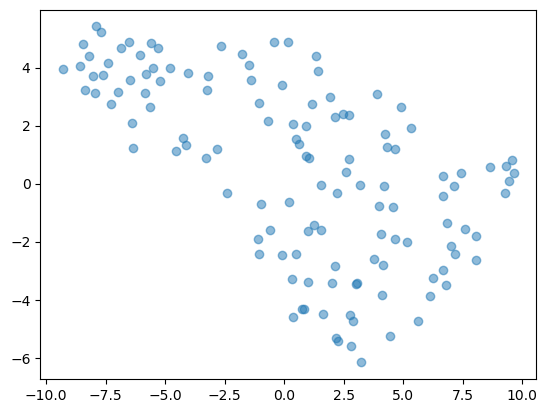

In [62]:
df_embedded=TSNE(n_components=2,learning_rate='auto',init='random',perplexity=30).fit_transform(df)
print("shape: ",df_embedded.shape)
print("First few points: \n",df_embedded[0:4,:])

plt.scatter(df_embedded[:,0],df_embedded[:,1],alpha=0.5)
plt.show()

shape:  (126, 2)
First few points: 
 [[-3.6809871   3.6526072 ]
 [-5.741563    1.6646428 ]
 [-2.5572062  -0.22667389]
 [ 0.63226396 -1.660104  ]]


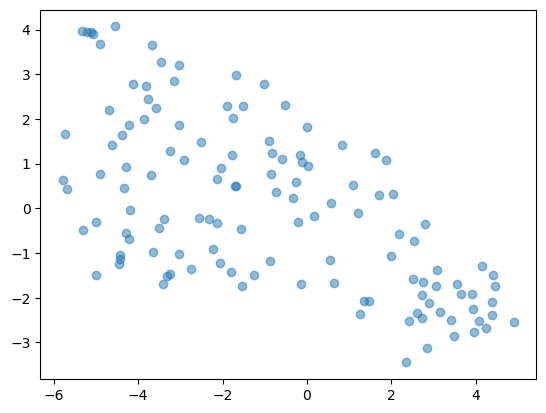

In [63]:
df_embedded=TSNE(n_components=2,learning_rate='auto',init='random',perplexity=45).fit_transform(df)
print("shape: ",df_embedded.shape)
print("First few points: \n",df_embedded[0:4,:])

plt.scatter(df_embedded[:,0],df_embedded[:,1],alpha=0.5)
plt.show()

## Evaluation and Comparison